# Phamaceutical Drug Spending by countries - Data Science Learning Project
**Personal Project | Python, Pandas, Matplotlib, Seaborn**

Developed a data science project aimed at analyzing pharmaceutical drug spending trends to explore how statistical analysis can inform business decision-making in the pharmaceutical sector.
This self-initiated project was designed for learning purposes and to demonstrate key data science competencies

---



Pharmaceutical company's seeks to harness the power of statistical analysis on pharmaceutical drug spending data to drive informed decision-making, optimize resource allocation, and capitalize on market opportunities. By leveraging data-driven insights, they can to enhance their competitive advantage, maximize ROI return on investment, and achieve sustainable growth in the pharmaceutical.


Objectives


*   Gain Insights: Utilize statistical analysis to gain deep insights into pharmaceutical drug spending patterns, market trends, and consumer behavior.
*   Explore the possiblity of Optimize Resource Allocation, Identify high-potential markets and allocate resources strategically to maximize returns and minimize risks.

Also pre process the dataset so that it can be used for
predictive analytics models to forecast future pharmaceutical drug spending trends, demand patterns, and market dynamics. Use machine learning algorithms to predict market fluctuations and consumer behavior.

This anlytical exploration will be used to make company wide decitions sales & marketing (what markets to target) to supplycain (forecast demand, and streamline distribution processes)

In [1]:
#Pharmaceutical Drug Spending by countries
import pandas as pd
# padas is a libary that works with diffrent data structures helping you make data manipulation and analysis
# with capablites to read and write data from various file formats such as CSV, Excel, SQL

import numpy as np
#  NumPy includes a comprehensive collection of mathematical functions for performing arithmetic and statistical operatitions on arrays and datatsets

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as  msno
# These librarys (matplotlib , seaborn ,missing) are used for creating static, interactive, and animated visualizations.




In [2]:
pharma_drug_spend_df = pd.read_csv('data_csv.csv')
#here we have created a data frame . which is a two-dimensional labeled data structure with columns of potential diffrent data types

In [3]:
pharma_drug_spend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     1036 non-null   object 
 1   TIME         1036 non-null   int64  
 2   PC_HEALTHXP  1036 non-null   float64
 3   PC_GDP       1036 non-null   float64
 4   USD_CAP      1036 non-null   float64
 5   FLAG_CODES   63 non-null     object 
 6   TOTAL_SPEND  1036 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 56.8+ KB


**PC_HEALTHXP** = percentage of health expenditure
It refers to portion of a country's total expenditure that is allocated to healthcare.

**PC_GDP** = percentage of Gross Domestic Product

**USD_CAP** = expenditure per capita in US dollars.
It indicates the average amount of healthcare spending per individual in the given country.




In [4]:
pharma_drug_spend_df.head()

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
0,AUS,1971,15.992,0.727,35.720,NaN,462.11
1,AUS,1972,15.091,0.686,36.056,NaN,475.11
2,AUS,1973,15.117,0.681,39.871,NaN,533.47
3,AUS,1974,14.771,0.755,47.559,NaN,652.65
4,AUS,1975,11.849,0.682,47.561,NaN,660.76


This show the first 5 rows. I use this function to get a snapshot of how our data looks like .From this display we can automaticaly see that the collumn flag_codes has entries listed as NaN (non at number) which represents missing data

Most of the data types are numerical which is idea for statitsical anylasis that we will be doing on the data . This data set will also be used in a mechine learning model. If there was categorigal varibale  whe wold have to encode using methods like one hot encoding  

In [5]:
pharma_drug_spend_df.tail()

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
1031,LTU,2012,28.942,1.820,448.728,NaN,1340.70
1032,LTU,2013,28.173,1.728,461.178,NaN,1364.02
1033,LTU,2014,27.836,1.724,485.245,NaN,1422.92
1034,LTU,2015,26.784,1.745,504.422,NaN,1465.30
1035,RUS,2015,22.939,1.286,309.900,NaN,44655.62


Again I have used the function .tail() to get a wholistic understaning of the data sets that I am working with

In [6]:
pharma_drug_spend_df.describe()

,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
count,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000
mean,1996.809846,16.406307,1.170948,295.046989,11765.423118
std,12.498330,6.389064,0.465635,209.152134,34878.286123
min,1970.000000,5.545000,0.207000,3.160000,6.290000
25%,1987.000000,11.516250,0.768250,111.098500,728.180000
50%,1999.000000,14.967500,1.141500,266.332000,2349.570000
75%,2007.000000,20.590500,1.523250,446.109500,7778.180000
max,2016.000000,40.239000,2.797000,1162.399000,373009.910000


Here, we present a summary statistics display showcasing numerical columns, facilitating insights into the distribution, central tendency, and spread of the data.

Upon observation of the average mean and median of "Total Spend" and "USD Cap," notable differences emerge. Notably, the mean and median of "USD Cap" coincide, reflecting symmetrical distribution. However, a considerable disparity between the mean and median of "Total Spend" suggests skewness in its distribution.

Furthermore, leveraging quartile analysis, we can compare countries to discern their positioning within the upper or lower quartiles (25th or 75th percentile). This comparative examination aids in identifying outliers and understanding the spread of data, offering valuable insights into the distributional characteristics of the dataset.

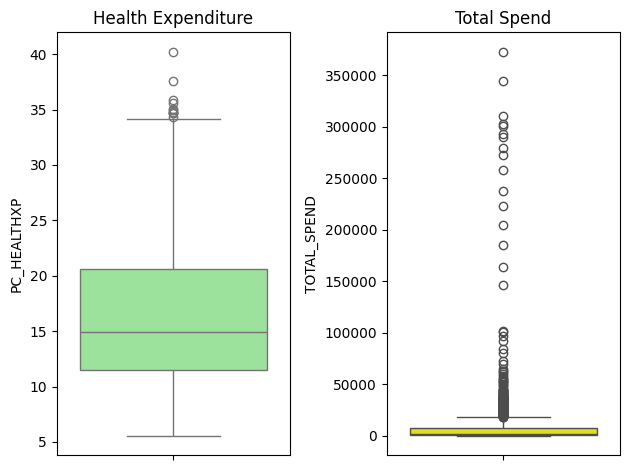

In [7]:
plt.subplot(1, 2, 2)
sns.boxplot(data=pharma_drug_spend_df, y='TOTAL_SPEND', color='yellow')
plt.title('Total Spend')

plt.subplot(1, 2, 1)
sns.boxplot(data=pharma_drug_spend_df, y='PC_HEALTHXP', color='lightgreen')
plt.title('Health Expenditure')

plt.tight_layout()
plt.show()

In this section, I've generated a box plot to delve deeper into our previous findings and assess various aspects of our dataset. We aim to ascertain the skewness of the data, identify potential outliers, and evaluate the level of data dispersion, all of which are crucial steps in preparing the data for preprocessing.

This box plot presents a comparison between two key variables: PC Health (representing the percentage of health spending) and Total Spend.

Total Spend is an aggregate metric derived from "Percentage of Health Spending," "Percentage of GDP," and "US Dollars per Capita." By incorporating data on US dollars per capita and population, Total Spend provides a more comprehensive and contextualized understanding of expenditure.


Total Spend incorporates various contributing factors ,each of the factors could introduce variability and influence the overall distribution of the Total Spend metric. For example, differences in GDP across countries or variations in per capita income could lead to disparities in spending levels, contributing to a potentially skewed distribution.

On the other hand, Percentage of Health Spending may represent a more direct and focused measure of healthcare expenditure, which could explain the less extreme distribution compared to the composite Total Spend metric.

Therefore, it's plausible to suggest that the inclusion of diverse factors in Total Spend calculation may contribute to its skewed distribution, especially when compared to a more specific metric like Percentage of Health Spending.

Here we have used a histogram to futher explore the total spend distribution . We suspected the it was a left side skew beacuse the meadiumn was lager thant than mean . This histogram defintaly confirms that hypothesis.

In [11]:
pharma_drug_spend_df.shape

(1036, 7)

This function tells us that ther is 1036 rows and 7 columns

# Data cleaning

In [12]:
pharma_drug_spend_df.isnull()

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
0,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False
2,False,False,False,False,False,True,False
3,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...
1031,False,False,False,False,False,True,False
1032,False,False,False,False,False,True,False
1033,False,False,False,False,False,True,False
1034,False,False,False,False,False,True,False


In [13]:
null_count = pharma_drug_spend_df.isnull().sum().sum()
print('Number of null values:', null_count)

Number of null values: 973


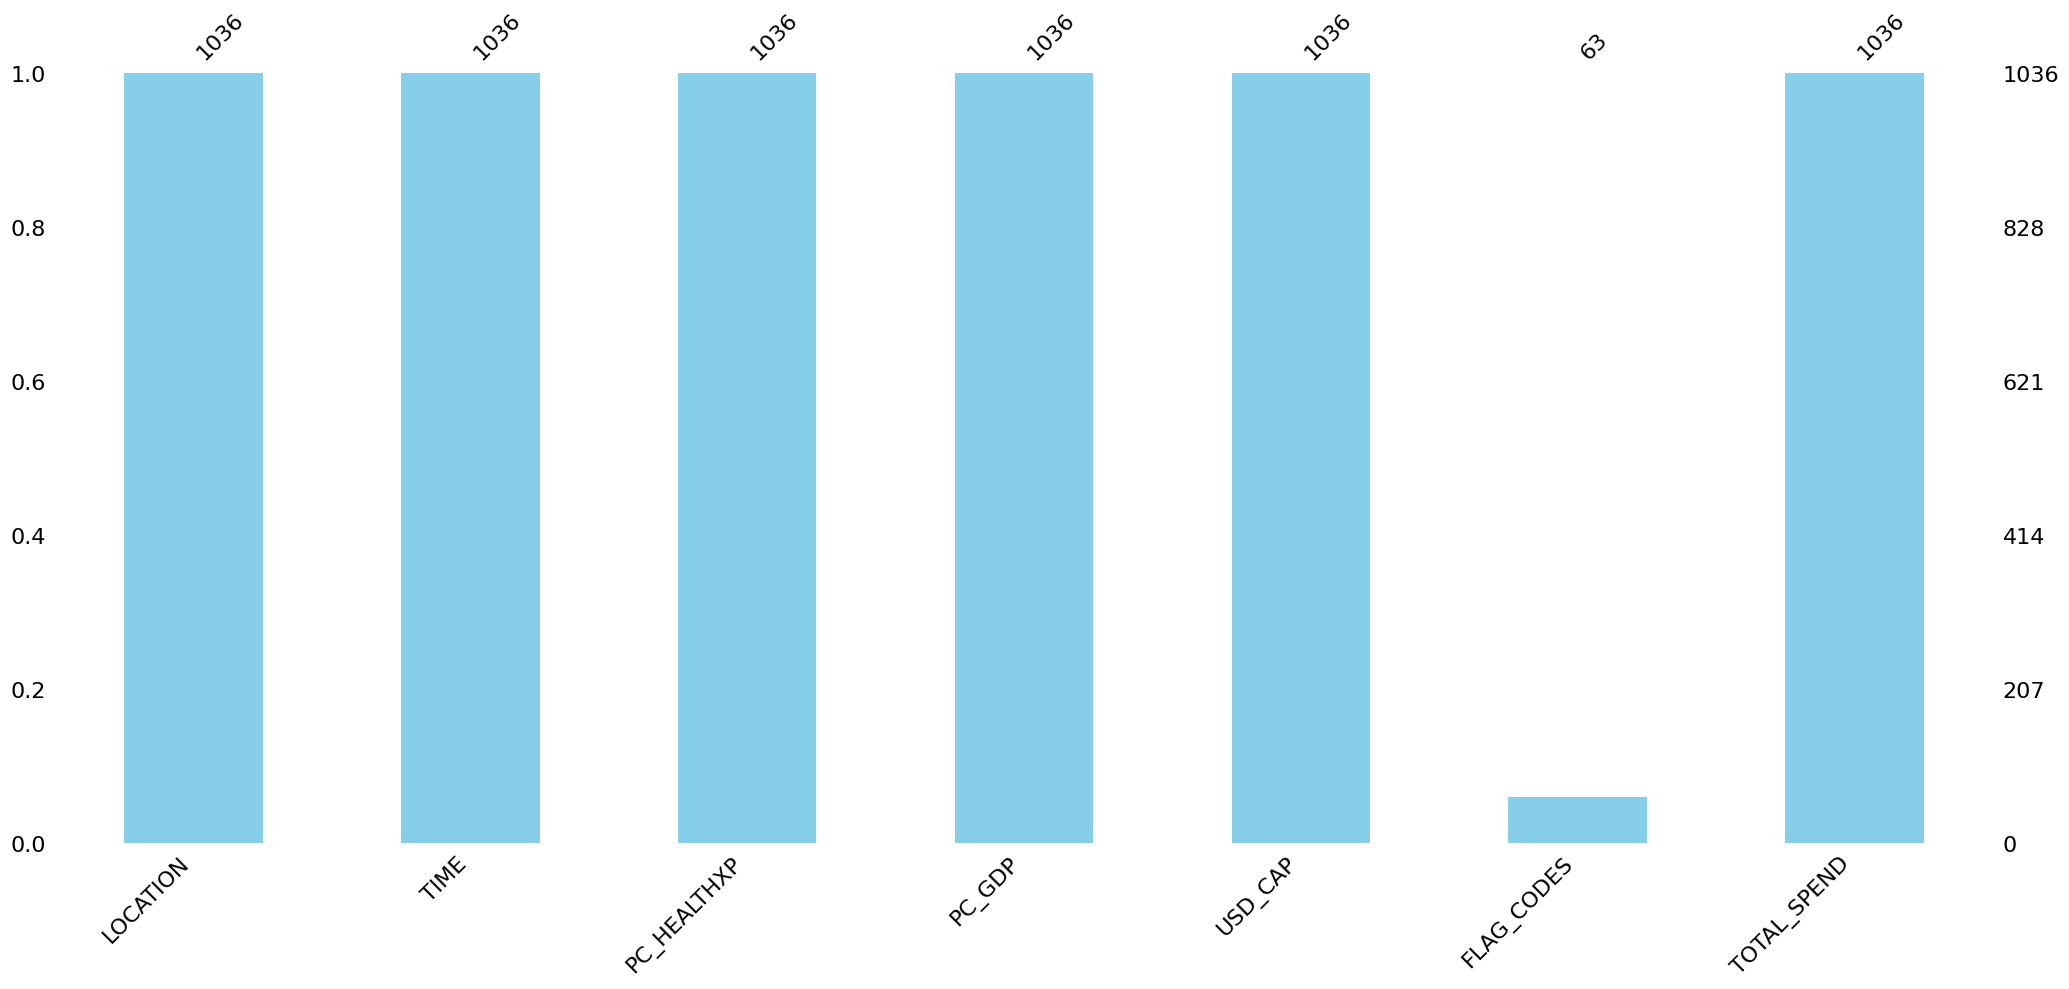

In [14]:
msno.bar(pharma_drug_spend_df, color='skyblue')

plt.show()

Here is a visulisation of how many missing values. Here we can validate the only column that is missing data is FLAG_CODES. With all the other columns haveing 1036 enteries

In [15]:
def count_p_flag_codes(pharma_drug_spend_df):
    count = 0
    # Assuming 'FLAG_Codes' is the name of the column containing flag codes
    flag_codes_column = pharma_drug_spend_df['FLAG_CODES']
    for code in flag_codes_column:
        if code == 'B':
            count += 1
    return count

# Count the number of 'P' flag codes
p_count = count_p_flag_codes(pharma_drug_spend_df)

# Output the result
print("Number of 'B' flag codes:", p_count)

Number of 'B' flag codes: 46


In [16]:
pharma_drug_spend_df.dropna(axis=1, inplace=True)

In [17]:
pharma_drug_spend_df.head()

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
0,AUS,1971,15.992,0.727,35.720,462.11
1,AUS,1972,15.091,0.686,36.056,475.11
2,AUS,1973,15.117,0.681,39.871,533.47
3,AUS,1974,14.771,0.755,47.559,652.65
4,AUS,1975,11.849,0.682,47.561,660.76


The dropna() method serves to eliminate columns that contain any missing values from a DataFrame. While it's crucial in machine learning (ML) preprocessing to conserve as much data as feasible and address missing values where possible, there are instances where dropping certain columns becomes necessary.

In this dataset, the "Flag codes" column contains more missing data than actual data. Moreover, this column is not expected to offer pertinent information for our ML model. It's important to note that including irrelevant features can hinder the accuracy and efficiency of the machine learning model. Hence, dropping this column is both logical and beneficial for enhancing model performance.

In [18]:
pharma_drug_spend_df.duplicated()

duplicate_rows = pharma_drug_spend_df[pharma_drug_spend_df.duplicated()]

if duplicate_rows.empty:
    print("No duplicate rows have been found.")
else:
    print("Duplicate rows have been detected:")
    print(duplicate_rows)

No duplicate rows have been found.



I've created this function to identify whether there are any duplicate rows in the dataset. This step ensures that there are no duplicates in the dataset, allowing us to proceed to the next stage of the data cleaning process. If duplicates are found, I would drop them as part of the data cleaning process.

In [19]:
# exploring catigorical variables
countries_df = pharma_drug_spend_df.LOCATION.unique()
print (countries_df)
#listing all the unique contry enteries and storing them in the variable

['AUS' 'AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'ISL'
 'IRL' 'ITA' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NZL' 'NOR' 'POL' 'PRT' 'SVK'
 'ESP' 'SWE' 'CHE' 'TUR' 'GBR' 'USA' 'EST' 'SVN' 'ISR' 'LVA' 'LTU' 'RUS']


In [20]:
#import pycountry

# Get a list of all countries and their ISO 3166-1 alpha-3 codes
#all_countries = [country.alpha_3 for country in pycountry.countries]

# since the import is not working I have manually define all the alpha-3 country codes from a list
all_countries = ['AFG', 'ALA', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'AIA', 'ATA', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA', 'BVT', 'BRA', 'IOT', 'BRN', 'BGR', 'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'CXR', 'CCK', 'COL', 'COM', 'COG', 'COD', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FLK', 'FRO', 'FJI', 'FIN', 'FRA', 'GUF', 'PYF', 'ATF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP', 'GUM', 'GTM', 'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'HMD', 'VAT', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'PRK', 'KOR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MKD', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MTQ', 'MRT', 'MUS', 'MYT', 'MEX', 'FSM', 'MDA', 'MCO', 'MNG', 'MNE', 'MSR', 'MAR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL', 'NLD', 'NCL', 'NZL', 'NIC', 'NER', 'NGA', 'NIU', 'NFK', 'MNP', 'NOR', 'OMN', 'PAK', 'PLW', 'PSE', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'PCN', 'POL', 'PRT', 'PRI', 'QAT', 'REU', 'ROU', 'RUS', 'RWA', 'BLM', 'SHN', 'KNA', 'LCA', 'MAF', 'SPM', 'VCT', 'WSM', 'SMR', 'STP', 'SAU', 'SEN', 'SRB', 'SYC', 'SLE', 'SGP', 'SXM', 'SVK', 'SVN', 'SLB', 'SOM', 'ZAF', 'SGS', 'SSD', 'ESP', 'LKA', 'SDN', 'SUR', 'SJM', 'SWZ', 'SWE', 'CHE', 'SYR', 'TWN', 'TJK', 'TZA', 'THA', 'TLS', 'TGO', 'TKL', 'TON', 'TTO', 'TUN', 'TUR', 'TKM', 'TCA', 'TUV', 'UGA', 'UKR', 'ARE', 'GBR', 'USA', 'UMI', 'URY', 'UZB', 'VUT', 'VEN', 'VNM', 'VGB', 'VIR', 'WLF', 'ESH', 'YEM', 'ZMB', 'ZWE']


# Check if each country code in country_df (contries from the data set) is in all_countries

valid = True

for code in countries_df:
    if code not in all_countries:
        print(f"Invalid country code: {code}")
        valid = False
    else:
        print(f"Valid country code: {code}")

if valid == True:
    print("All countries are valid.")

Valid country code: AUS
Valid country code: AUT
Valid country code: BEL
Valid country code: CAN
Valid country code: CZE
Valid country code: DNK
Valid country code: FIN
Valid country code: FRA
Valid country code: DEU
Valid country code: GRC
Valid country code: HUN
Valid country code: ISL
Valid country code: IRL
Valid country code: ITA
Valid country code: JPN
Valid country code: KOR
Valid country code: LUX
Valid country code: MEX
Valid country code: NLD
Valid country code: NZL
Valid country code: NOR
Valid country code: POL
Valid country code: PRT
Valid country code: SVK
Valid country code: ESP
Valid country code: SWE
Valid country code: CHE
Valid country code: TUR
Valid country code: GBR
Valid country code: USA
Valid country code: EST
Valid country code: SVN
Valid country code: ISR
Valid country code: LVA
Valid country code: LTU
Valid country code: RUS
All countries are valid.


This operation has validated each location. It was conducted as part of the data cleaning process to ensure the uniqueness and correctness of each country code.

In [21]:
pharma_drug_spend_df['LOCATION'] = pd.Categorical(pharma_drug_spend_df['LOCATION'])

This converts 'Location' to a categorical data typeint the Data Frame, enabling to be able to perform  categorical operations such as accessing categories, reordering categories, or using them in statistical analysis

In [22]:
pharma_drug_spend_df.head()

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
0,AUS,1971,15.992,0.727,35.720,462.11
1,AUS,1972,15.091,0.686,36.056,475.11
2,AUS,1973,15.117,0.681,39.871,533.47
3,AUS,1974,14.771,0.755,47.559,652.65
4,AUS,1975,11.849,0.682,47.561,660.76


## Data exploration, including statistical analysis

<Figure size 200x200 with 0 Axes>

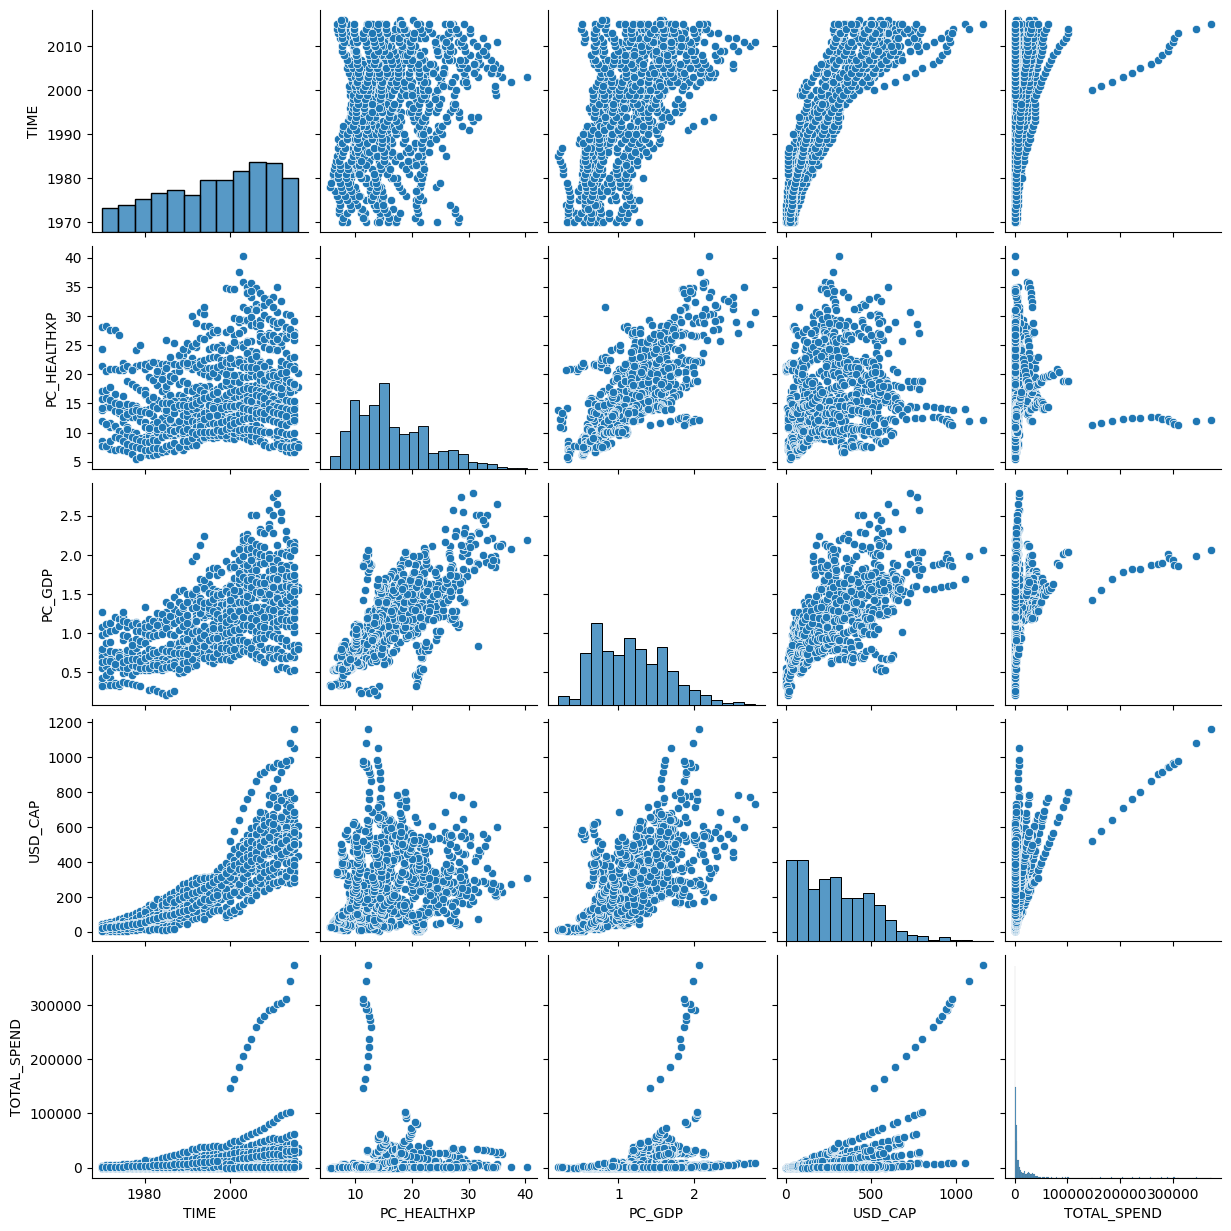

In [23]:
plt.figure(figsize=(2,2))
sns.pairplot(pharma_drug_spend_df,)
plt.show()

**Observation1 **

This visualization provides insight into the correlations between each feature, aiding in understanding the dataset more comprehensively.

For instance, an observable trend indicates a positive correlation with time across all features. This suggests that with the progression of time, various factors such as Total Spend on pharmaceutical drugs, USD Cap, GDP, and Percentage of Health Spending have shown an increase.

The positive correlation indicates a growing market for pharmaceutical products over time. Pharmaceutical companies can interpret this as an opportunity for expansion and increased revenue potential.




<Figure size 600x600 with 0 Axes>

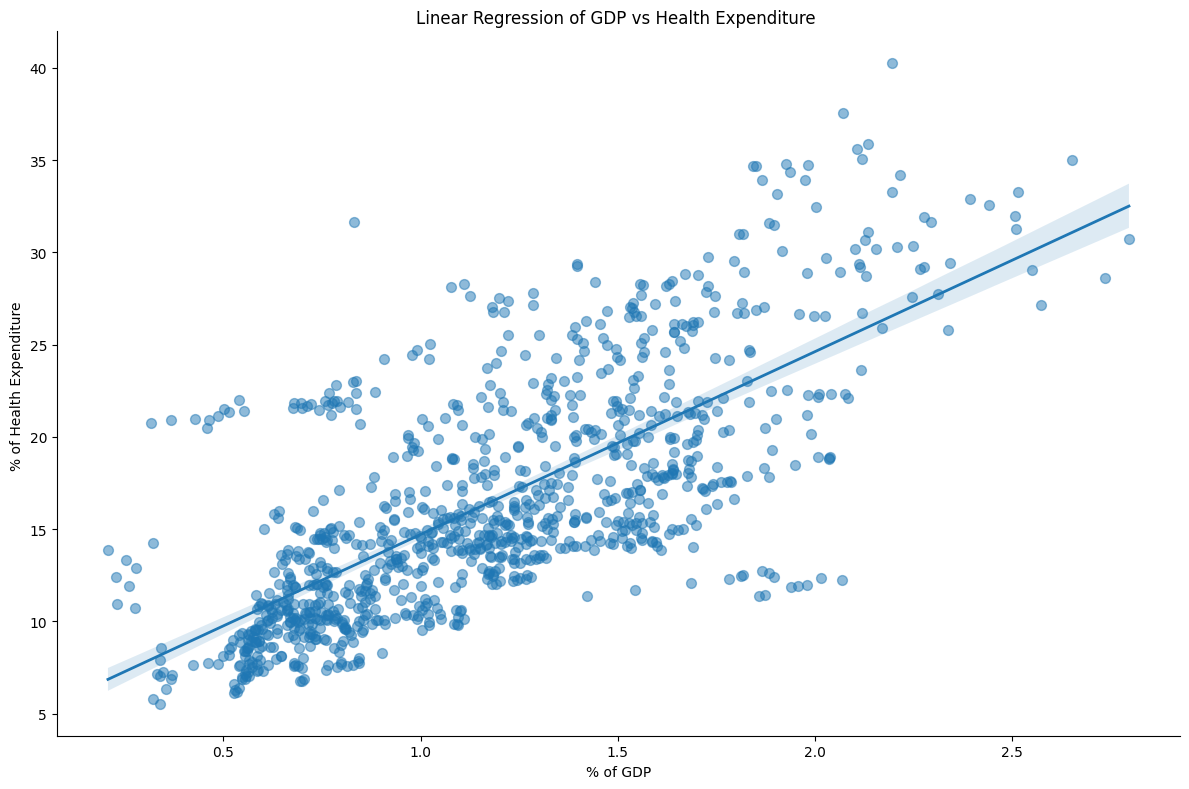

In [24]:
plt.figure(figsize=(6,6))

sns.lmplot(data=pharma_drug_spend_df, x='PC_GDP', y='PC_HEALTHXP',
           height=8, aspect=1.5,
           scatter_kws={'s': 50, 'alpha': 0.5},
           line_kws={'lw': 2})
plt.xlabel('% of GDP')
plt.ylabel('% of Health Expenditure ')
plt.title('Linear Regression of GDP vs Health Expenditure ')

plt.tight_layout()
plt.show()

<Figure size 600x600 with 0 Axes>

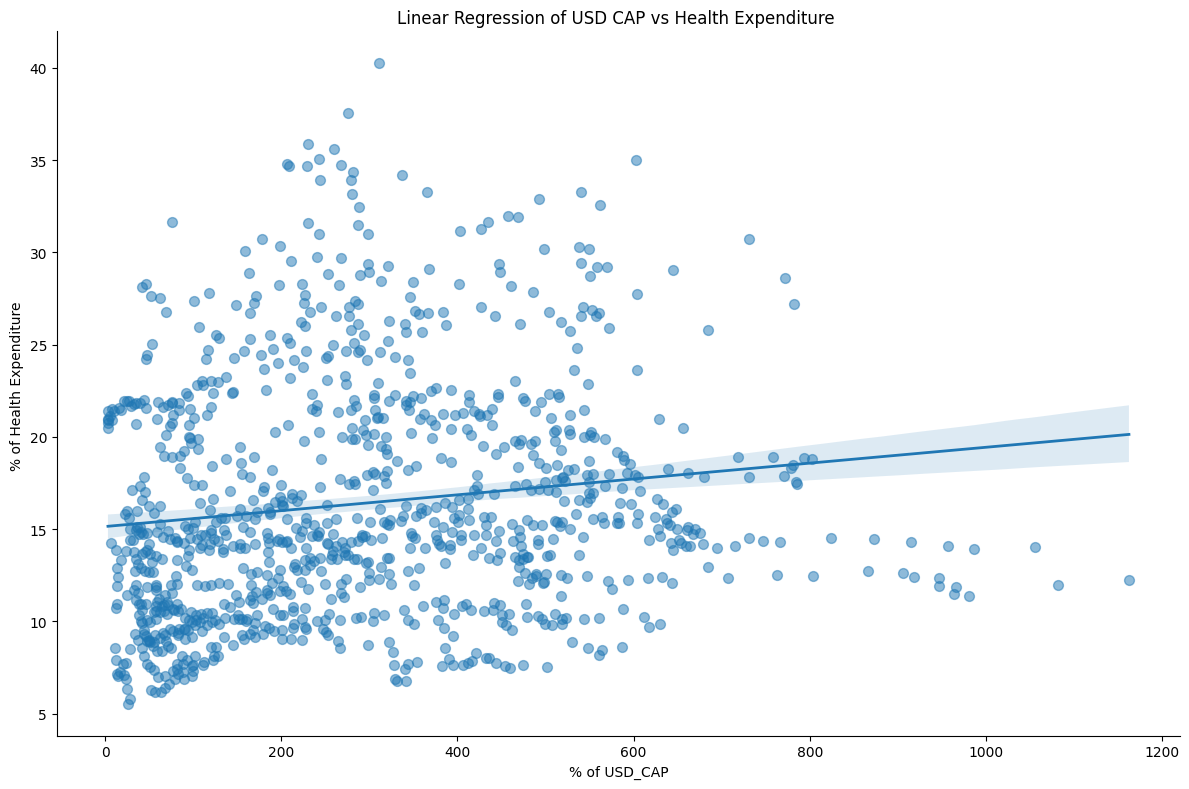

In [25]:
plt.figure(figsize=(6,6))

sns.lmplot(data=pharma_drug_spend_df, x='USD_CAP', y='PC_HEALTHXP',
           height=8, aspect=1.5,
           scatter_kws={'s': 50, 'alpha': 0.5},
           line_kws={'lw': 2})
plt.xlabel('% of USD_CAP')
plt.ylabel('% of Health Expenditure ')
plt.title('Linear Regression of USD CAP vs Health Expenditure ')

plt.tight_layout()
plt.show()

**Observation2 **

A positive correlation emerges between GDP and the expenditure on pharmaceutical drugs as indicated by both Health Spending and Total Spend.Showin in the scatter graphs and futher demostrated in the linear regression graph which conatians a line of best fit.

The positive correlation between GDP with pharmaceutical expenditure implies that economic factors play a significant role in driving pharmaceutical spending. Therfore Pharmaceutical companies should closely monitor economic indicators to anticipate changes in the market , consumer purchasing power and adjust their strategies accordingly .

The correlation suggests between GDP and health expenditure surgest, there may be greater potential for pharmaceutical sales growth.

This insight enables companies to strategically leverage this information prioritize markets with higher or ascending GDP for expansion initiatives and investment endeavors. By doing so, they can effectively target their marketing efforts toward economies exhibiting substantial market potential.

In [27]:
import plotly.express as px
fig = px.line(pharma_drug_spend_df, x='TIME', y='TOTAL_SPEND', color='LOCATION')
fig.show()

FLAG_CODES

B: Indicates a "Break" in the data series or a significant deviation from the usual pattern.

D: Stands for "Difference in methodology," indicating a change in the methodology used for collecting or analysing the data.

E: Represents an "Estimated value," implying that the value is an estimation rather than an exact measurement.

P: Indicates a "Provisional value," suggesting that the value is

This visualization offers a comprehensive view of diverse markets and their growth trajectories. Again Pharmaceutical companies can strategically leverage this insight to devise plans and position themselves effectively to capitalize on emerging market opportunities.

An exaple of this is Japan. Drawing from operational insights and experience in packing lines, it's evident that Japan presents a formidable market with stringent regulations. To successfully penetrate this market, meticulous strategic planning is imperative. As depicted in the graph, Japan exhibits significant market potential, making it a promising territory for prioritization. Thus, it's essential for the company to devise a tailored strategy to navigate Japan's regulatory landscape effectively. Alongside the United States, Japan emerges as a prime candidate for strategic prioritization, warranting focused attention and resource allocation to capitalize on its lucrative opportunities.

In [28]:
fig = px.line(pharma_drug_spend_df, x='TIME', y='PC_HEALTHXP', color='LOCATION')

fig.update_layout(
    title='Correlation between Time and PC Health Expenditure by Location(Markets)',
    xaxis_title='Time',
    yaxis_title='Health Expenditure',
    legend_title='Location'
)

fig.show()

This visulisation really shows the fluctation in all of the markets from 1970 -2015

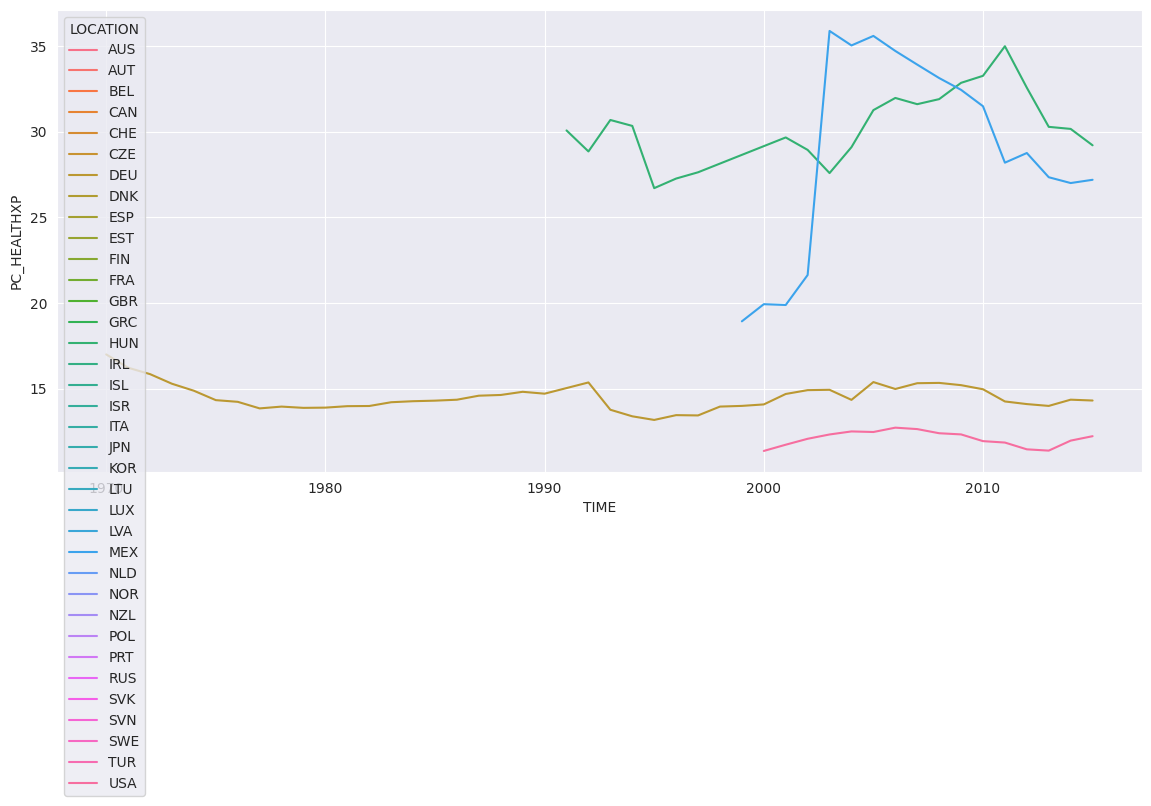

In [29]:
grcprt = pharma_drug_spend_df[pharma_drug_spend_df['LOCATION'].isin(['USA','MEX','DEU','HUN'])]
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
sns.lineplot(data=grcprt, x='TIME', y='PC_HEALTHXP',hue='LOCATION')
fig.update_layout(
    title='Isolating Markets (USA , Mexico , Germany and Hungary)',
    xaxis_title='Time',
    yaxis_title='Health Expenditure',
    legend_title='Location'
)
plt.show()

Here I have singled out individual markets that I want to examine more closely. By placing them on the same graph, I aim to highlight the advantages of being able to compare and study markets effectively.

For example, this visualization clearly illustrates that DEU (Germany) is a mature and steady market compared to Hungary or Mexico, which appear to be emerging markets. This comparative analysis provides valuable insights into the differing levels of market development and potential opportunities for growth.

# Summary

As part of this Datascience project, I conducted comprehensive analysis of the dataset's quality and distribution. After cleaning and structuring the data, I explored the relationship between national economic strength and healthcare expenditure, uncovering a strong positive correlation. The results suggested that countries with stronger economies are more likely to invest heavily in pharmaceuticals, highlighting growth opportunities in emerging markets.

To deepen the analysis, I conducted market segmentation and incorporated external research sources to enrich contextual understanding. This end-to-end approach provided a well-rounded view of global pharmaceutical trends, enabling strategic insights into regional market dynamics. Through this project, I demonstrated skills in data wrangling, correlation analysis, and storytelling with data, showcasing how data-driven insights can inform strategic decision-making in real-world scenarios.

## Improvemeonts / Opportunities for Project Enhancement

To further improve the depth and impact of this project, a key enhancement would be the integration of a larger and more diverse dataset that includes a broader range of international markets. By consolidating data from multiple sources, the analysis could capture a more comprehensive view of global pharmaceutical spending patterns. This would enable more robust statistical analysis, stronger predictive capabilities, and deeper insights into regional differences and emerging market opportunities.

Additionally, incorporating interactive visualizations (e.g., using Plotly or Tableau) would significantly enhance user engagement and data exploration. Unlike static charts, interactive visuals allow users to filter, zoom, and drill down into specific aspects of the data—promoting a more intuitive and insightful exploration experience. This improvement would not only elevate the presentation quality but also support better-informed strategic planning and decision-making through clearer communication of key trends and findings.